In [6]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

cred = credentials.Certificate("key.json")
firebase_admin.initialize_app(cred,
                             {'databaseURL': 'https://esp32wifitest-4f0ee-default-rtdb.europe-west1.firebasedatabase.app/'})

<IPython.core.display.Javascript object>


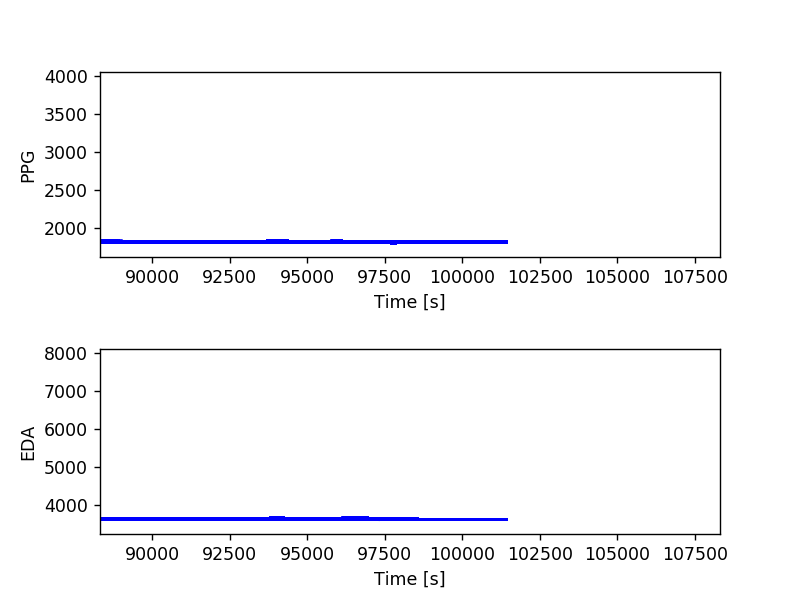

In [5]:
import time
#import psutil
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
plt.xlabel('Time [s]')
plt.ylabel('PPG')
ax2 = fig.add_subplot(2,1,2)
plt.xlabel('Time [s]')
plt.ylabel('EDA')
plt.subplots_adjust(hspace=0.5) 
fig.show()

In [ ]:
time, PPG, EDA = [], [], []

while True:
    # TIME
    ref_t   = db.reference("Time").child("Value").order_by_key().limit_to_last(1).get()
    tuple_t = list(ref_t.items())
    last_t_key = tuple_t[0]
    
    # PPG
    ref_PPG = db.reference("PPG").child("Value").order_by_key().limit_to_last(1).get()
    tuple_PPG = list(ref_PPG.items())
    last_PPG_key = tuple_PPG[0]
    
    # EDA
    ref_EDA = db.reference("EDA").child("Value").order_by_key().limit_to_last(1).get()
    tuple_EDA = list(ref_EDA.items())
    last_EDA_key = tuple_EDA[0]
    
    # Append data
    time.append(last_t_key[1])
    PPG.append(last_PPG_key[1])
    EDA.append(last_EDA_key[1])
    
    ax1.plot(time, PPG, color='b')
    ax2.plot(time, EDA, color='b')
    
    fig.canvas.draw()
    
    ax1.set_xlim(left=max(0, last_t_key[1]-10000), right=last_t_key[1]+10000)
    ax2.set_xlim(left=max(0, last_t_key[1]-10000), right=last_t_key[1]+10000)
    
    #time.sleep(0.1)


In [39]:
ref = db.reference("Time").child("Value")
snapshot = ref.order_by_key().limit_to_last(1).get()
tuple_list = list(snapshot.items())
key_value = tuple_list[0]
key_value[1]

21000

In [ ]:
plt.close()